In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib

In [2]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')
df


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [3]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print("Missing values per column:")
df.isna().sum()
print("Duplicate rows:", df.duplicated().sum())

Missing values per column:
Duplicate rows: 0


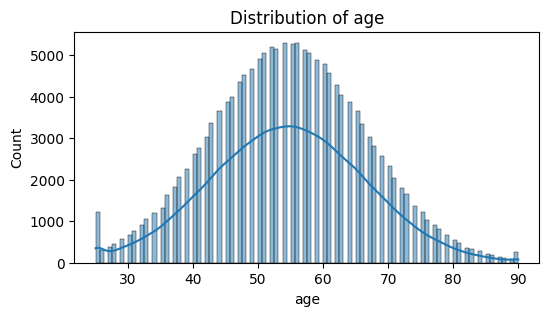

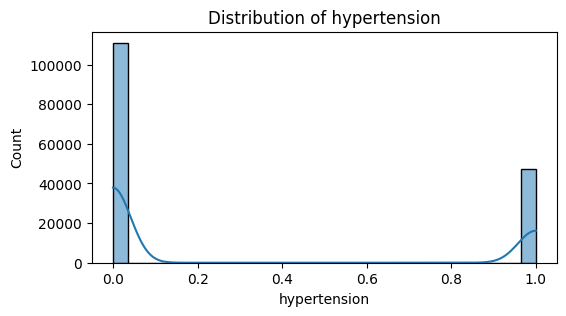

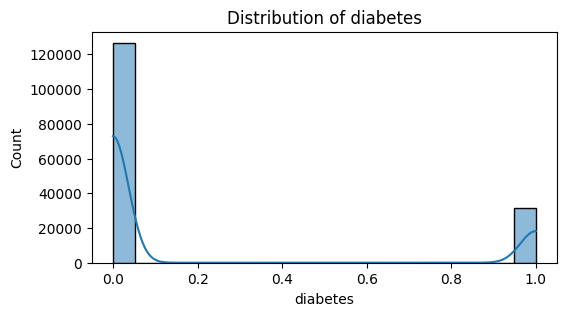

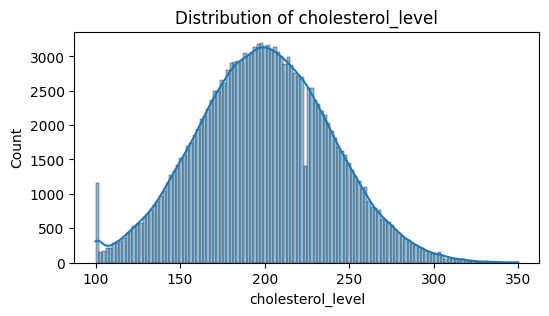

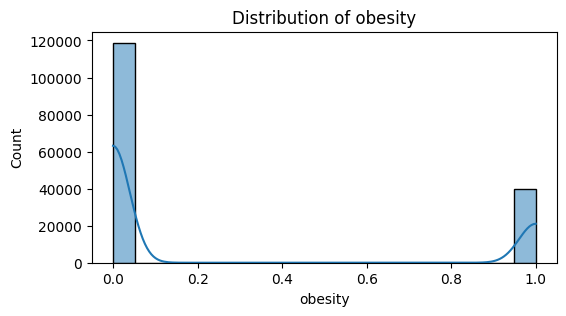

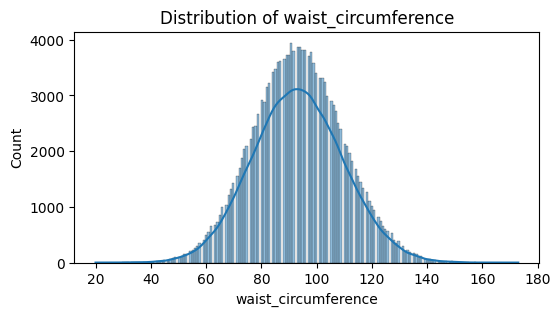

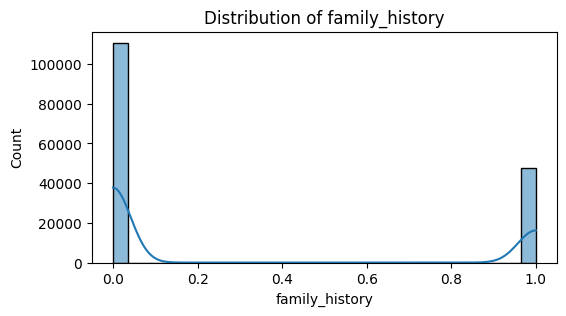

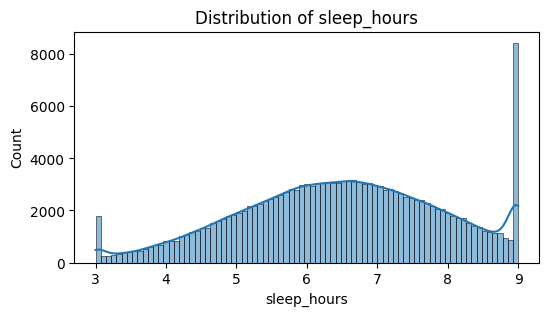

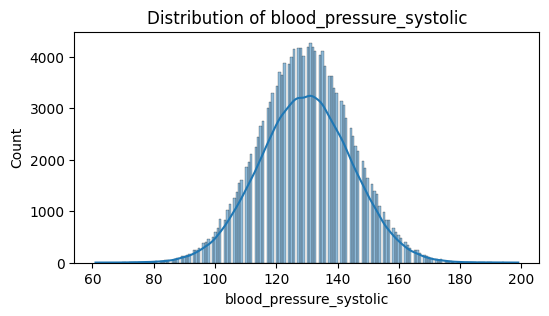

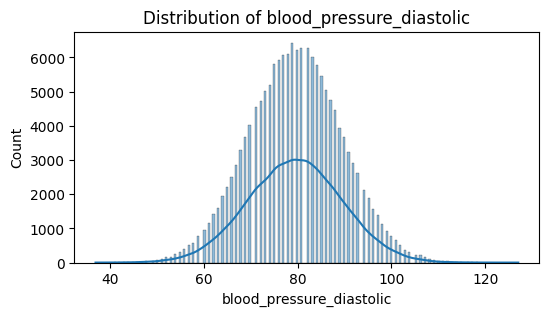

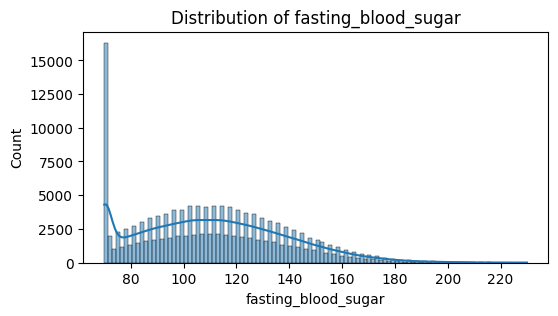

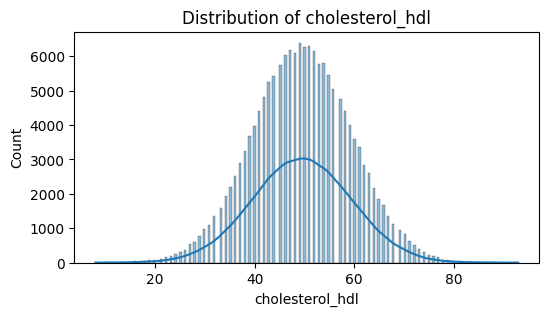

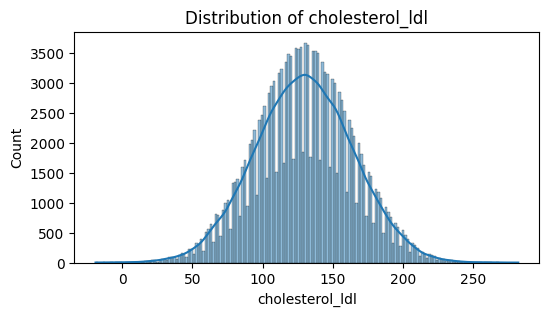

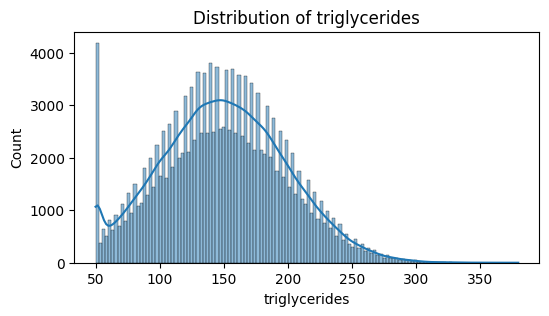

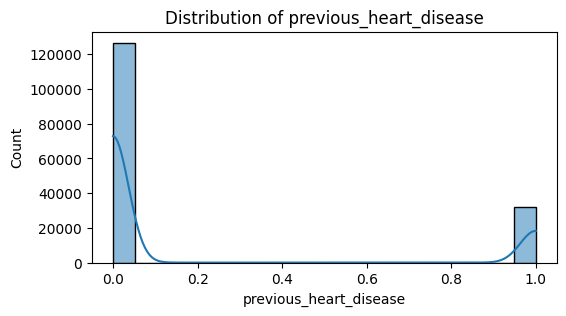

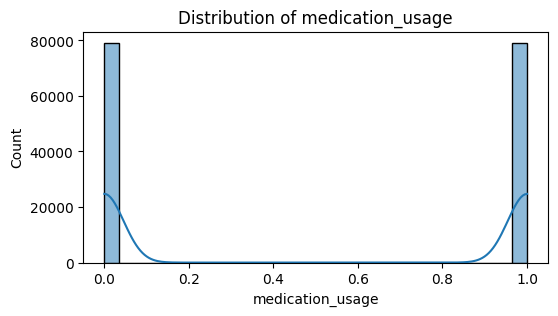

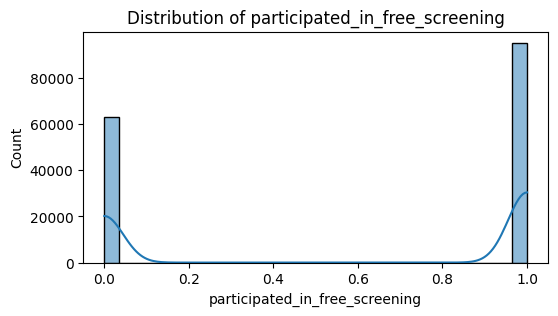

In [6]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if 'heart_attack' in numeric_cols:
  numeric_cols.remove('heart_attack')
for col in numeric_cols:
  plt.figure(figsize=(6,3))
  sns.histplot(df[col].dropna(), kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

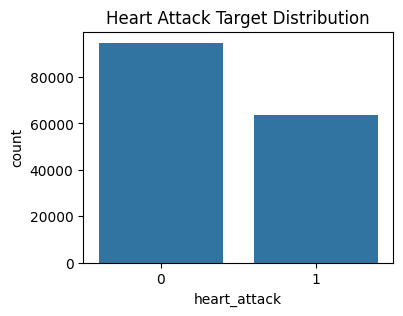

In [7]:
# Target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='heart_attack', data=df)
plt.title('Heart Attack Target Distribution')
plt.show()

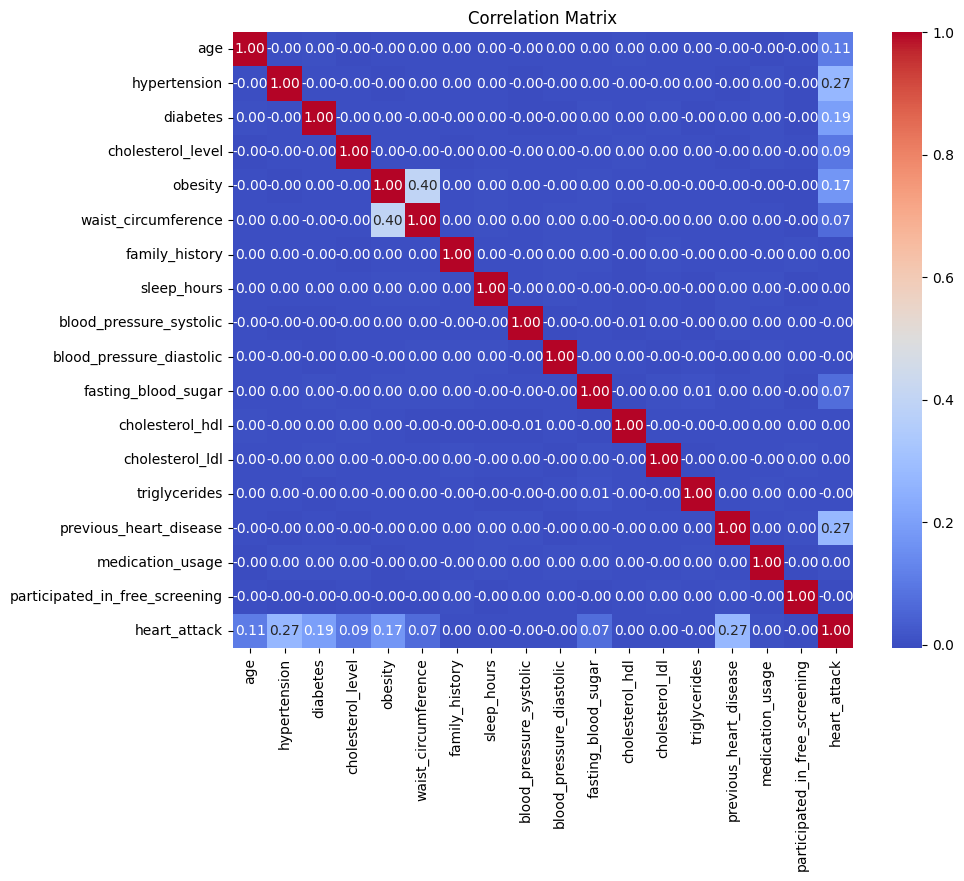

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['heart_attack']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# 6. Preprocessing pipeline
cat_features = df.select_dtypes(include=['object','category']).columns.tolist()


numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_cols), ('cat', categorical_transformer, cat_features)])


X = df.drop(columns=['heart_attack'])
y = df['heart_attack']


X_prep = preprocessor.fit_transform(X)
cat_ohe = preprocessor.named_transformers_['cat']['onehot']
cat_cols = cat_ohe.get_feature_names_out(cat_features).tolist() if cat_features else []
df_clean = pd.DataFrame(X_prep, columns=numeric_cols + cat_cols)
df_clean['heart_attack'] = y.values


df_clean.head()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(columns=['heart_attack']), df_clean['heart_attack'], test_size=0.2, stratify=df_clean['heart_attack'], random_state=42)
X_train.shape, X_test.shape

((126684, 42), (31671, 42))

In [ ]:
# %% Cell 2
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

results = []

for name, model in models.items():
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    
    results.append({
        "Model": name,
        "Fold1_ROC-AUC": scores[0],
        "Fold2_ROC-AUC": scores[1],
        "Fold3_ROC-AUC": scores[2],
        "Min_ROC-AUC": np.min(scores),
        "Max_ROC-AUC": np.max(scores),
        "Median_ROC-AUC": np.median(scores)
    })

results_df = pd.DataFrame(results)
print("=== Baseline Models CV ROC-AUC (per fold & summary) ===")
results_df


=== Baseline Models CV ROC-AUC (per fold & summary) ===


,Model,Fold1_ROC-AUC,Fold2_ROC-AUC,Fold3_ROC-AUC,Min_ROC-AUC,Max_ROC-AUC,Median_ROC-AUC
0,LogisticRegression,0.804503,0.804796,0.802659,0.802659,0.804796,0.804503
1,RandomForest,0.801354,0.802778,0.802426,0.801354,0.802778,0.802426
2,GradientBoosting,0.817743,0.817913,0.817783,0.817743,0.817913,0.817783


In [ ]:
# %% Fast Hyperparameter Tuning with HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from scipy.stats import randint, uniform
import numpy as np
import pandas as pd

# --- Use a sample of training data for faster tuning ---
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=0.2, stratify=y_train, random_state=42
)

# Base model (fast version)
gb_model = HistGradientBoostingClassifier(random_state=42, max_iter=100)

# Hyperparameter distributions (smaller search space)
param_dist = {
    'max_iter': randint(50, 150),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'min_samples_leaf': randint(20, 100)
}

# F1-score for class 1
f1_scorer = make_scorer(f1_score, pos_label=1)

# RandomizedSearchCV
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # 2-fold for speed
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=20,  # fewer iterations for speed
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit on sampled data
random_search.fit(X_train_sample, y_train_sample)
best_model = random_search.best_estimator_

print("=== Best Parameters ===")
print(random_search.best_params_)
print("Best CV F1-score (class 1):", random_search.best_score_)

# --- Predict probabilities on full test set ---
y_proba = best_model.predict_proba(X_test)[:, 1]

# --- Faster Threshold tuning ---
thresholds = np.arange(0.3, 0.51, 0.05)  # step 0.05
results = []
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    results.append({
        "Threshold": t,
        "Precision_class1": precision_score(y_test, y_pred_t),
        "Recall_class1": recall_score(y_test, y_pred_t),
        "F1_class1": f1_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(results)
best_idx = threshold_df["F1_class1"].idxmax()
best_threshold = threshold_df.loc[best_idx, "Threshold"]

print("\nBest Threshold based on F1-score for class 1:", best_threshold)
threshold_df


Fitting 2 folds for each of 20 candidates, totalling 40 fits
=== Best Parameters ===
{'learning_rate': 0.07234221521788219, 'max_depth': 3, 'max_iter': 103, 'min_samples_leaf': 23}
Best CV F1-score (class 1): 0.656054682432187

Best Threshold based on F1-score for class 1: 0.3


,Threshold,Precision_class1,Recall_class1,F1_class1
0,0.30,0.580937,0.844646,0.688400
1,0.35,0.618993,0.768819,0.685819
2,0.40,0.641574,0.725433,0.680931
3,0.45,0.668432,0.665748,0.667087
4,0.50,0.687527,0.619370,0.651671


In [ ]:
# %% Train Final Model on Full Training Data
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import joblib

# Best Hyperparameters from RandomizedSearchCV
best_params = {
    'learning_rate': 0.0723,
    'max_depth': 3,
    'max_iter': 103,
    'min_samples_leaf': 23,
    'random_state': 42
}

# Train model on full X_train
final_model = HistGradientBoostingClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict probabilities on test set
y_proba = final_model.predict_proba(X_test)[:, 1]

# Apply best Threshold
best_threshold = 0.3
y_pred = (y_proba >= best_threshold).astype(int)

# Evaluation metrics
metrics_df = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "Precision (class 1)", "Recall (class 1)", "F1-score (class 1)"],
    "Score": [
        roc_auc_score(y_test, y_proba),
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

print(f"=== Evaluation on Test Set (Threshold {best_threshold}) ===")
print(metrics_df)

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual 0", "Actual 1"],
                  columns=["Pred 0", "Pred 1"])
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save final model
joblib.dump(final_model, "heart_attack_final_model.pkl")
print("\nFinal model saved as 'heart_attack_final_model.pkl'")


=== Evaluation on Test Set (Threshold 0.3) ===
                Metric     Score
0              ROC-AUC  0.813830
1             Accuracy  0.691768
2  Precision (class 1)  0.578995
3     Recall (class 1)  0.847795
4   F1-score (class 1)  0.688075

Confusion Matrix:
          Pred 0  Pred 1
Actual 0   11142    7829
Actual 1    1933   10767

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.59      0.70     18971
           1       0.58      0.85      0.69     12700

    accuracy                           0.69     31671
   macro avg       0.72      0.72      0.69     31671
weighted avg       0.74      0.69      0.69     31671


Final model saved as 'heart_attack_final_model.pkl'


In [ ]:
# %% Train Final Model on Full Training Data
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import joblib

# Best Hyperparameters from RandomizedSearchCV
best_params = {
    'learning_rate': 0.0723,
    'max_depth': 3,
    'max_iter': 103,
    'min_samples_leaf': 23,
    'random_state': 42
}

# Train model on full X_train
final_model = HistGradientBoostingClassifier(**best_params)


# Save final model
joblib.dump(final_model, "heart_attack_final_model.pkl")
print("\nFinal model saved as 'heart_attack_final_model.pkl'")



Final model saved as 'heart_attack_final_model.pkl'


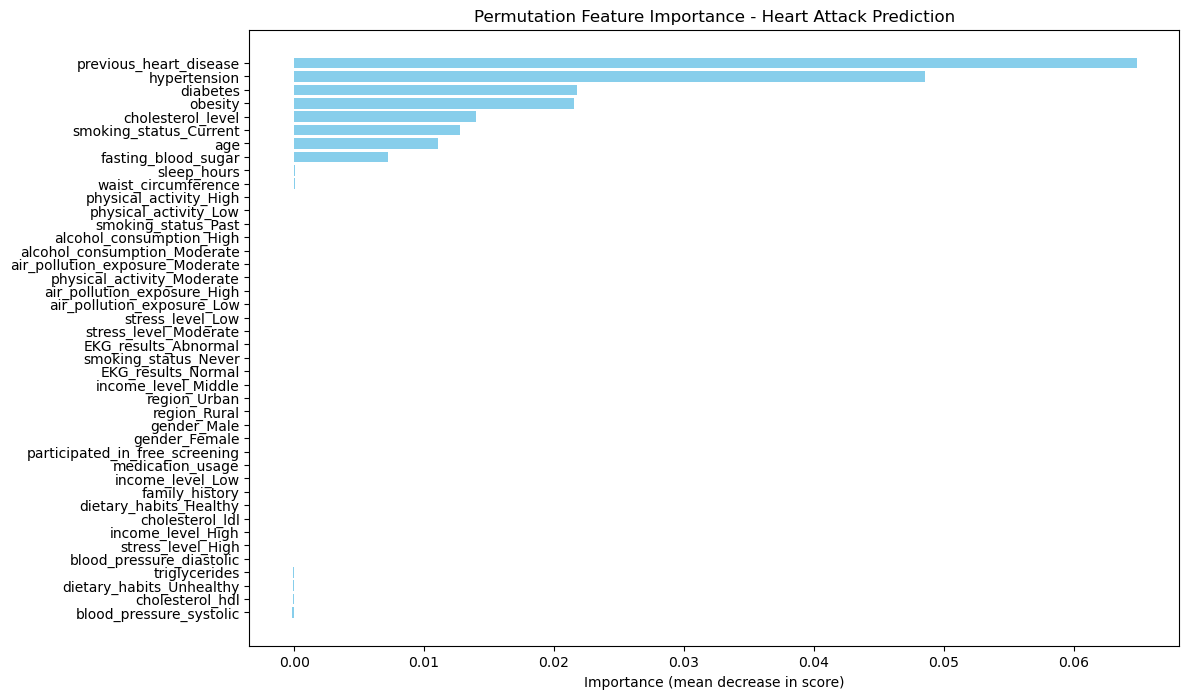

,Feature,Importance
14,previous_heart_disease,0.064867
1,hypertension,0.048565
2,diabetes,0.021793
4,obesity,0.021565
3,cholesterol_level,0.014000
24,smoking_status_Current,0.012794
0,age,0.011095
10,fasting_blood_sugar,0.007218
7,sleep_hours,0.000076
5,waist_circumference,0.000051


In [ ]:
# %% Permutation Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Calculate permutation importance on test set
perm_importance = permutation_importance(final_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create DataFrame
feat_imp_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance - Heart Attack Prediction")
plt.xlabel("Importance (mean decrease in score)")
plt.show()

# Optional: top 20 features
feat_imp_df.head(20)
